## Reading and Exploring Data

https://datacarpentry.org/python-ecology-lesson/02-starting-with-data.html
https://figshare.com/articles/dataset/Portal_Project_Teaching_Database/1314459

In [ ]:
import pandas as pd

In [5]:
df = pd.read_csv('surveys.csv')

In [9]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [11]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [17]:
df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [19]:
df.shape

(35549, 9)

In [21]:
df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [37]:
sites_names = pd.unique(df['plot_id'])

len(sites_names)

24

In [35]:
df['plot_id'].nunique()

24

## Groups

In [43]:
df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [47]:
df['weight'].min()

4.0

In [55]:
df.groupby('sex').describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [63]:
df.groupby('sex').min(numeric_only = True)

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,3,1,1,1977,1,7.0,4.0
M,1,1,1,1977,1,2.0,4.0


In [81]:
df.groupby(['plot_id', 'sex']).mean(numeric_only = True).head()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   

                weight  
plot_id sex             
1       F    46.311138  
        M    55.950560  
2       F    52.561845  
        M    51.391382  
3       F    31.215349

In [85]:
df.groupby(['weight', 'plot_id']).describe().head()

record_id                                                    \
                   count     mean           std      min      25%      50%   
weight plot_id                                                               
4.0    1             1.0    218.0           NaN    218.0    218.0    218.0   
       3             2.0   5568.0   2143.947761   4052.0   4810.0   5568.0   
       4             2.0  17098.0  18113.247307   4290.0  10694.0  17098.0   
       7             1.0  10439.0           NaN  10439.0  10439.0  10439.0   
       10            1.0  10119.0           NaN  10119.0  10119.0  10119.0   

                                 month       ...     year          \
                    75%      max count mean  ...      75%     max   
weight plot_id                               ...                    
4.0    1          218.0    218.0   1.0  9.0  ...  1977.00  1977.0   
       3         6326.0   7084.0   2.0  7.5  ...  1981.75  1982.0   
       4        23502.0  29906.0   2.0  7.0  ...  1994.50  1999.0   
       7        10439.0  10439.0   1.0  5.0  ...  1985.00  1985.0   
       10       10119.0  10119.0   1.0  3.0  ...  1985.00  1985.0   

               hindfoot_length                                                  
                         count  mean       std   min    25%   50%    75%   max  
weight plot_id                                                                  
4.0    1                   1.0  13.0       NaN  13.0  13.00  13.0  13.00  13.0  
       3                   2.0  15.5  0.707107  15.0  15.25  15.5  15.75  16.0  
       4                   1.0  21.0       NaN  21.0  21.00  21.0  21.00  21.0  
       7                   1.0  16.0       NaN  16.0  16.00  16.0  16.00  16.0  
       10                  1.0  16.0       NaN  16.0  16.00  16.0  16.00  16.0  

[5 rows x 40 columns]

In [87]:
df.groupby(['plot_id'])['weight'].describe().head()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0


In [89]:
df.groupby('species_id')['record_id'].count()['DO']

3027

In [98]:
df.groupby('species_id').count()['record_id'].head()

species_id
AB    303
AH    437
AS      2
BA     46
CB     50
Name: record_id, dtype: int64

In [96]:
df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

<Axes: xlabel='species_id'>

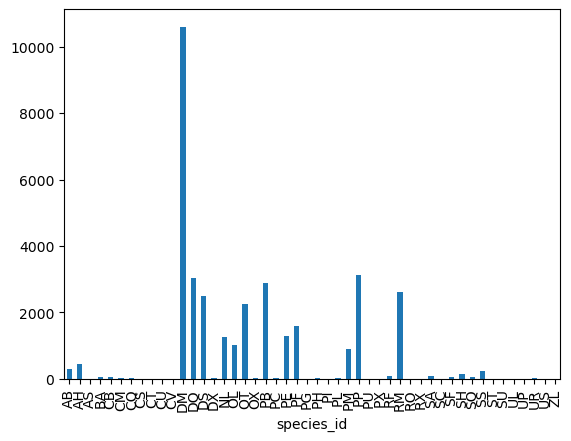

In [100]:
df.groupby('species_id').count()['record_id'].plot(kind='bar')

In [ ]:
df.groupby('species_id').count()['record_id'].plot(kind='bar')

<Axes: xlabel='plot_id'>

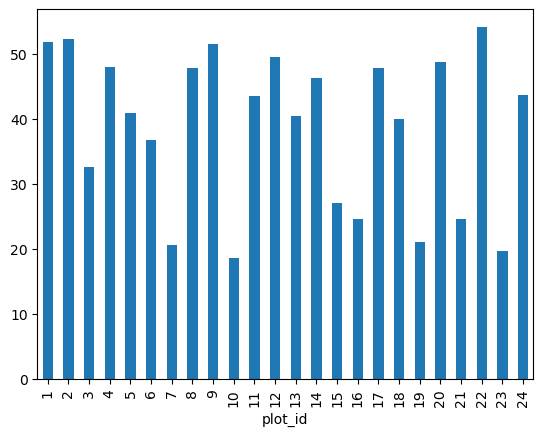

In [114]:
df.groupby('plot_id').mean(numeric_only=True)['weight'].plot(kind='bar')

In [116]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


<Axes: xlabel='sex'>

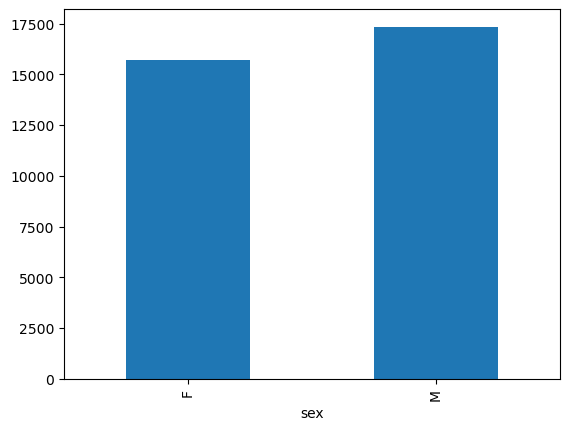

In [120]:
df.groupby('sex').count()['record_id'].plot(kind='bar')

In [132]:
df.groupby(['plot_id', 'sex']).sum()['weight'].head()

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
Name: weight, dtype: float64

In [136]:
df.groupby(['plot_id', 'sex']).sum()['weight'].unstack().head()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0


Text(0.5, 0, 'Plot')

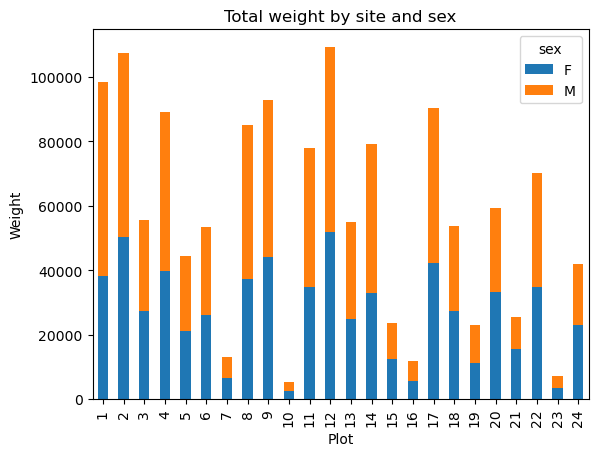

In [140]:
s_plot = df.groupby(['plot_id', 'sex']).sum()['weight'].unstack().plot(kind='bar', stacked=True, title = 'Total weight by site and sex')
s_plot.set_ylabel('Weight')
s_plot.set_xlabel('Plot')

## Indexing and Slicing

In [147]:
df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [149]:
s_species = df['species_id']

In [151]:
df[['species_id', 'plot_id']]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


In [155]:
df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


In [157]:
df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [163]:
df[-1]

KeyError: -1

In [161]:
df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


Using the '=' operator in the simple statement y = x does not create a copy of our DataFrame. Instead, y = x creates a new variable y that references the same object that x refers to. To state this another way, there is only one object (the DataFrame), and both x and y refer to it

In [167]:
true_copy_df = df.copy()

ref_surveys_df = df

In [171]:
ref_surveys_df[0:3] = 0
ref_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [173]:
true_copy_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [175]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [180]:
df = pd.read_csv("surveys.csv")

**Slicing Subsets of Rows and Columns in Python**

* iloc is primarily an integer based indexing counting from 0. That is, your specify rows and columns giving a number. Thus, the first row is row 0, the second column is column 1, etc.

* loc is primarily a label based indexing where you can refer to rows and columns by their name. E.g., column ‘month’. Note that integers may be used, but they are interpreted as a label.



To select a subset of rows and columns from our DataFrame, we can use the iloc method. For example, we can select month, day and year (columns 2, 3 and 4 if we start counting at 1), like this

In [184]:
df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


In [198]:
df.iloc[0:10, :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [202]:
df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

Indexing by labels loc differs from indexing by integers iloc. With loc, both the start bound and the stop bound are inclusive. When using loc, integers can be used, but the integers refer to the index label and not the position. For example, using loc and select 1:4 will get a different result than using iloc to select rows 1:4.

We can also select a specific data value using a row and column location within the DataFrame and iloc indexing:

In [224]:
df[0:1] #row 1
#df[0] # error - pandas doesn't support row indexing with square brackets, use .iloc[] or .loc[] to access rows.
df[:4] # first four rows
df[:-1] #all rows except the last one

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [238]:
df.iloc[0:1] # row 1
df.iloc[0] # row 1
df.iloc[:4, :] #the first 4 rows, all columns 
df.iloc[0:4, 1:4] #the first 4 rows, 3 columns only
# df.loc[0:4, 1:4] - error, no rows and columns with that names

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


In [244]:
df[df.year == 2002].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0


In [246]:
df[df.year != 2002].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [250]:
df[(df.year >= 1980) & (df.year <= 1985)].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0


In [264]:
len(df[(df.year == 1999) & (df.weight <= 8)])

5

In [266]:
df[df['species_id'].isin(['DO', 'ML'])]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
67,68,8,19,1977,8,DO,F,32.0,52.0
291,292,10,17,1977,3,DO,F,36.0,33.0
293,294,10,17,1977,3,DO,F,37.0,50.0
316,317,10,17,1977,17,DO,F,32.0,48.0
322,323,10,17,1977,17,DO,F,33.0,31.0
...,...,...,...,...,...,...,...,...,...
35502,35503,12,31,2002,6,DO,M,33.0,32.0
35515,35516,12,31,2002,11,DO,F,35.0,52.0
35517,35518,12,31,2002,11,DO,M,36.0,38.0
35526,35527,12,31,2002,13,DO,F,33.0,43.0


## Data Types

In [269]:
df['sex'].dtype #type ‘O’ stands for “object” which in pandas is a string

dtype('O')

In [271]:
df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [273]:
df['record_id'] = df['record_id'].astype('float64')

df['record_id'].dtype

dtype('float64')

In [281]:
df['weight'].mean()

42.672428212991356

In [283]:
len(df[df['weight'].isna()])

3266

In [285]:
len(df[df['weight'] > 0])

32283

In [291]:
df1 = df.copy()
df1['weight'] = df1['weight'].fillna(0)
df1['weight'].mean()

38.751976145601844

We can fill NaN values with any value that we chose. The code below fills all NaN values with a mean for all weight values.

In [294]:
df1['weight'] = df['weight'].fillna(df['weight'].mean())

In [296]:
df.count()

record_id          35549
month              35549
day                35549
year               35549
plot_id            35549
species_id         34786
sex                33038
hindfoot_length    31438
weight             32283
dtype: int64

In [304]:
df.isna()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True
35545,False,False,False,False,False,False,True,True,True
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


In [308]:
for col in df.columns:
    print(col, len(df[df[col].isna()]))

record_id 0
month 0
day 0
year 0
plot_id 0
species_id 763
sex 2511
hindfoot_length 4111
weight 3266


In [312]:
df_na = df.dropna()
df_na.to_csv('surveys_complete.csv', index=False)

## Combining DataFrames

**Concatenating DataFrames**

When we concatenated our DataFrames, we simply added them to each other - stacking them either vertically or side by side. 

In [325]:
surveys_df = pd.read_csv("surveys.csv", keep_default_na=False, na_values=[""])
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [319]:
species_df = pd.read_csv("species.csv", keep_default_na=False, na_values=[""])
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [329]:
surv_head = surveys_df.head(10)
surv_last10 = surveys_df.tail(10).reset_index(drop=True)

When we concatenate DataFrames, we need to specify the axis. **axis=0** tells pandas to stack the second DataFrame UNDER the first one. It will automatically detect whether the column names are the same and will stack accordingly. To stack the data vertically, we need to make sure we have the same columns and associated column format in both datasets.

In [334]:
vertical_stack = pd.concat([surv_head, surv_last10], axis=0)
vertical_stack.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


**axis=1** will stack the columns in the second DataFrame to the RIGHT of the first DataFrame.  When we stack horizontally, we want to make sure what we are doing makes sense.

In [338]:
horizontal_stack = pd.concat([surv_head, surv_last10], axis=1)
horizontal_stack.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN,35540,12,31,2002,15,PB,F,26.0,23.0
1,2,7,16,1977,3,NL,M,33.0,NaN,35541,12,31,2002,15,PB,F,24.0,31.0
2,3,7,16,1977,2,DM,F,37.0,NaN,35542,12,31,2002,15,PB,F,26.0,29.0
3,4,7,16,1977,7,DM,M,36.0,NaN,35543,12,31,2002,15,PB,F,27.0,34.0
4,5,7,16,1977,3,DM,M,35.0,NaN,35544,12,31,2002,15,US,NaN,NaN,NaN


**Joining DataFrames**

Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique identifier). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other.

## Data Workflows and Automation

In [349]:
import os
os.mkdir('yearly_files')

In [ ]:
os.listdir()

In [362]:
surveys_df.year.unique()

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002])

In [370]:
for year in surveys_df.year.unique():
    filename = 'yearly_files/surveys' + str(year) + '.csv'
    surveys_year = surveys_df[surveys_df.year == year].dropna()
    surveys_year.to_csv(filename)
    # print(filename)

In [372]:
first, last = surveys_df.year.min(), surveys_df.year.max()

for year in range(first, last, 5):
    print(year)

    surveys_year = surveys_df[surveys_df.year == year].dropna()

1977
1982
1987
1992
1997


In [374]:
import os
os.mkdir('species_files')

In [376]:
for species in surveys_df.species_id.dropna().unique():
    filename = 'species_files/surveys' + str(species) + '.csv'
    surveys_species = surveys_df[surveys_df.species_id == species]

    surveys_species.to_csv(filename)

In [378]:
def one_year_csv_writer(this_year, all_data):
    """
    Writes a csv file for data from a given year.

    this_year -- year for which data is extracted
    all_data -- DataFrame with multi-year data
    """
    surveys_year = all_data[all_data.year == this_year] 
    surveys_year.to_csv('yearly_files/function_surveys' + str(this_year) + '.csv')

In [ ]:
def yearly_data_csv_writer(start_year, end_year, all_data):
    """
    Writes separate CSV files for each year of data.

    start_year -- the first year of data we want
    end_year -- the last year of data we want
    all_data -- DataFrame with multi-year data
    """
    
    for year in range(start_year, end_year+1):
        one_year_csv_writer(year, all_data)

## Making Plots With plotnine

In [385]:
!pip install plotnine
import plotnine as p9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 10.8 MB/s eta 0:00:00


In [387]:
df = pd.read_csv('surveys.csv').dropna()

In [395]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0


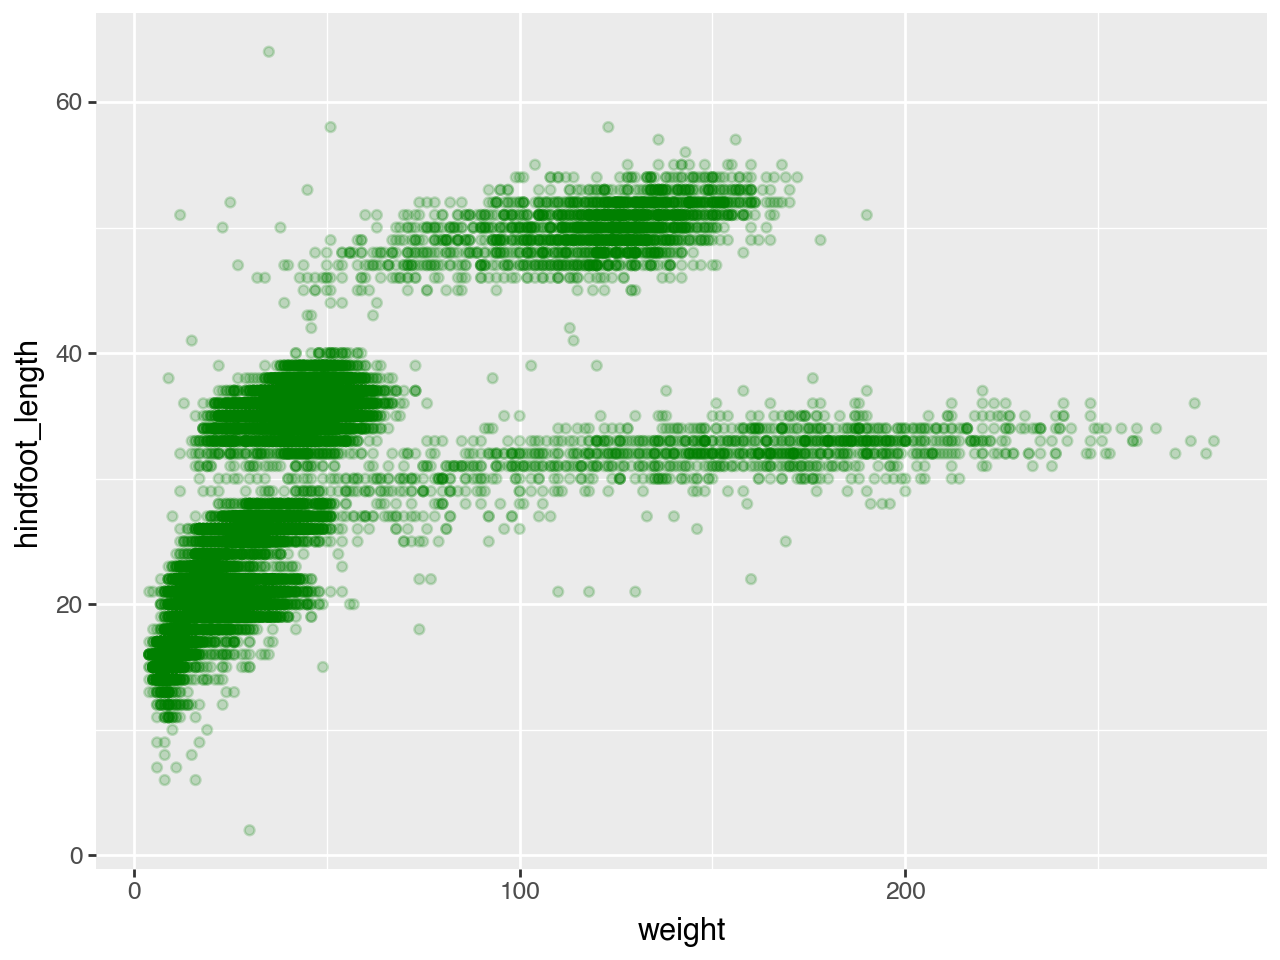

In [419]:
(p9.ggplot(data=df, 
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.2, color='green')
)

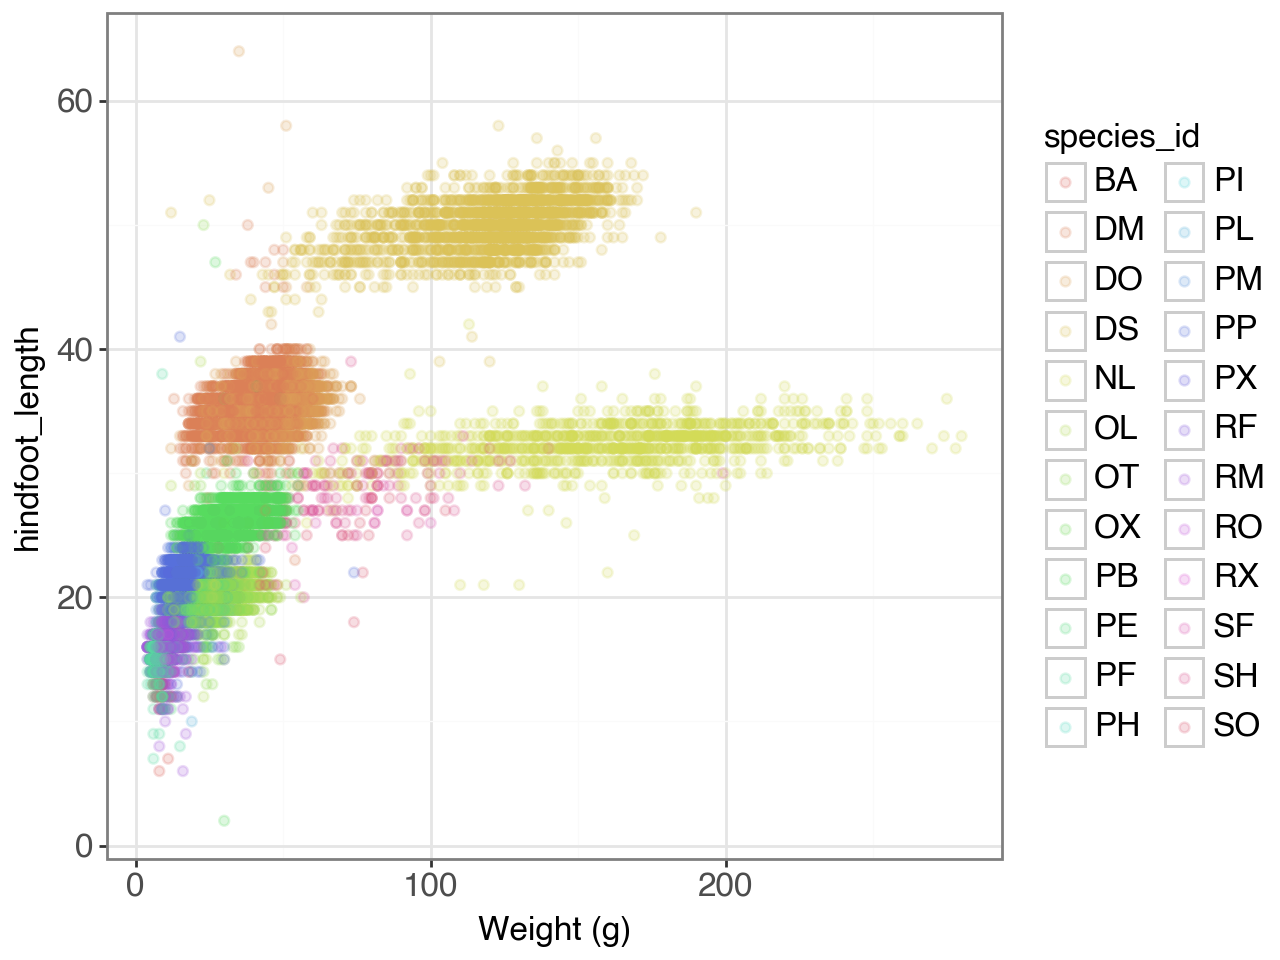

In [427]:
(p9.ggplot(data=df, 
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.2)
    + p9.xlab("Weight (g)")
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=12))
    
)

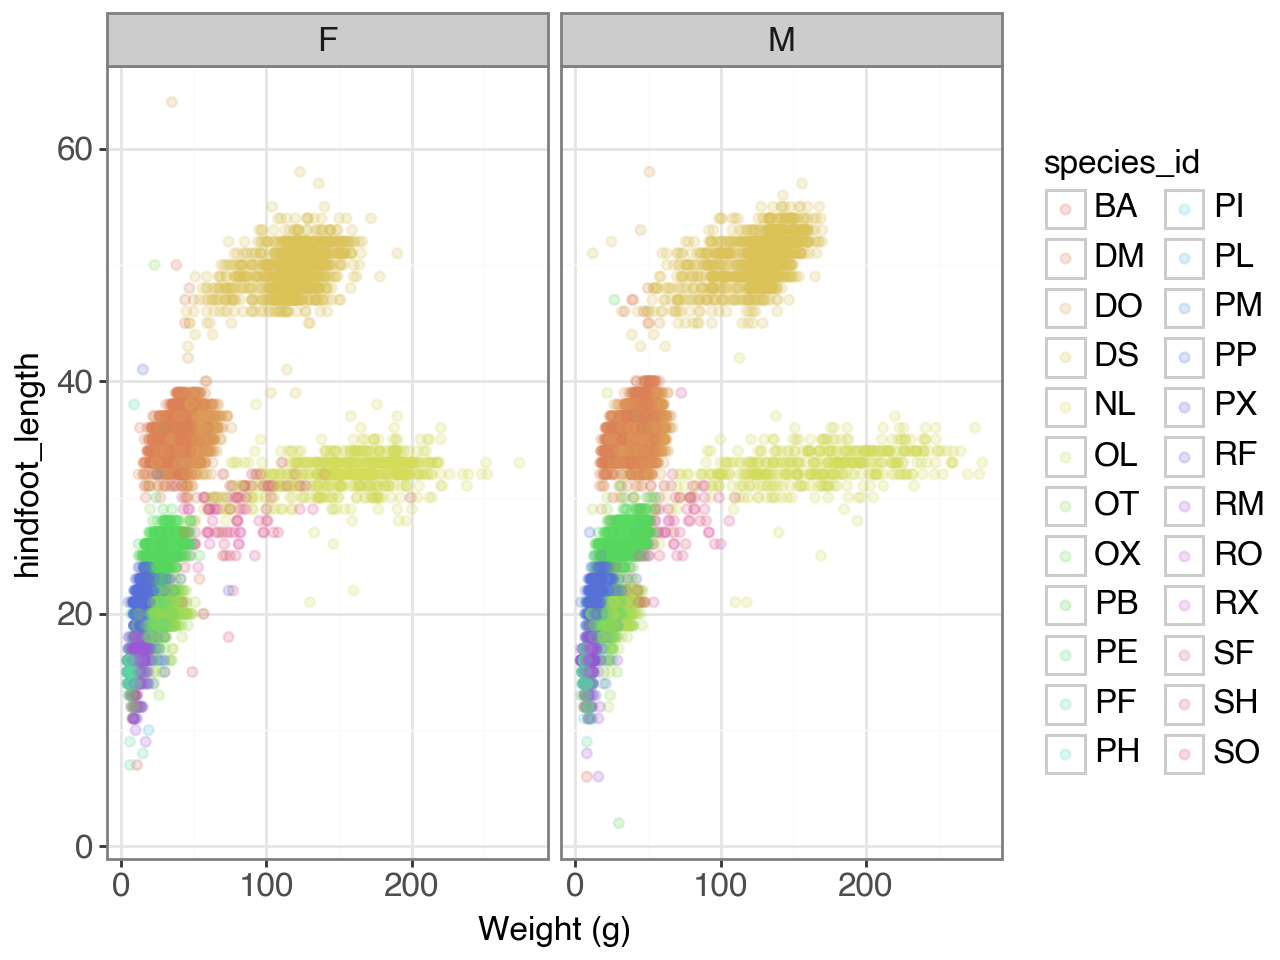

In [461]:
(p9.ggplot(data=df, 
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.2)
    + p9.xlab("Weight (g)")
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=12))
    + p9.facet_wrap('sex')
    
)

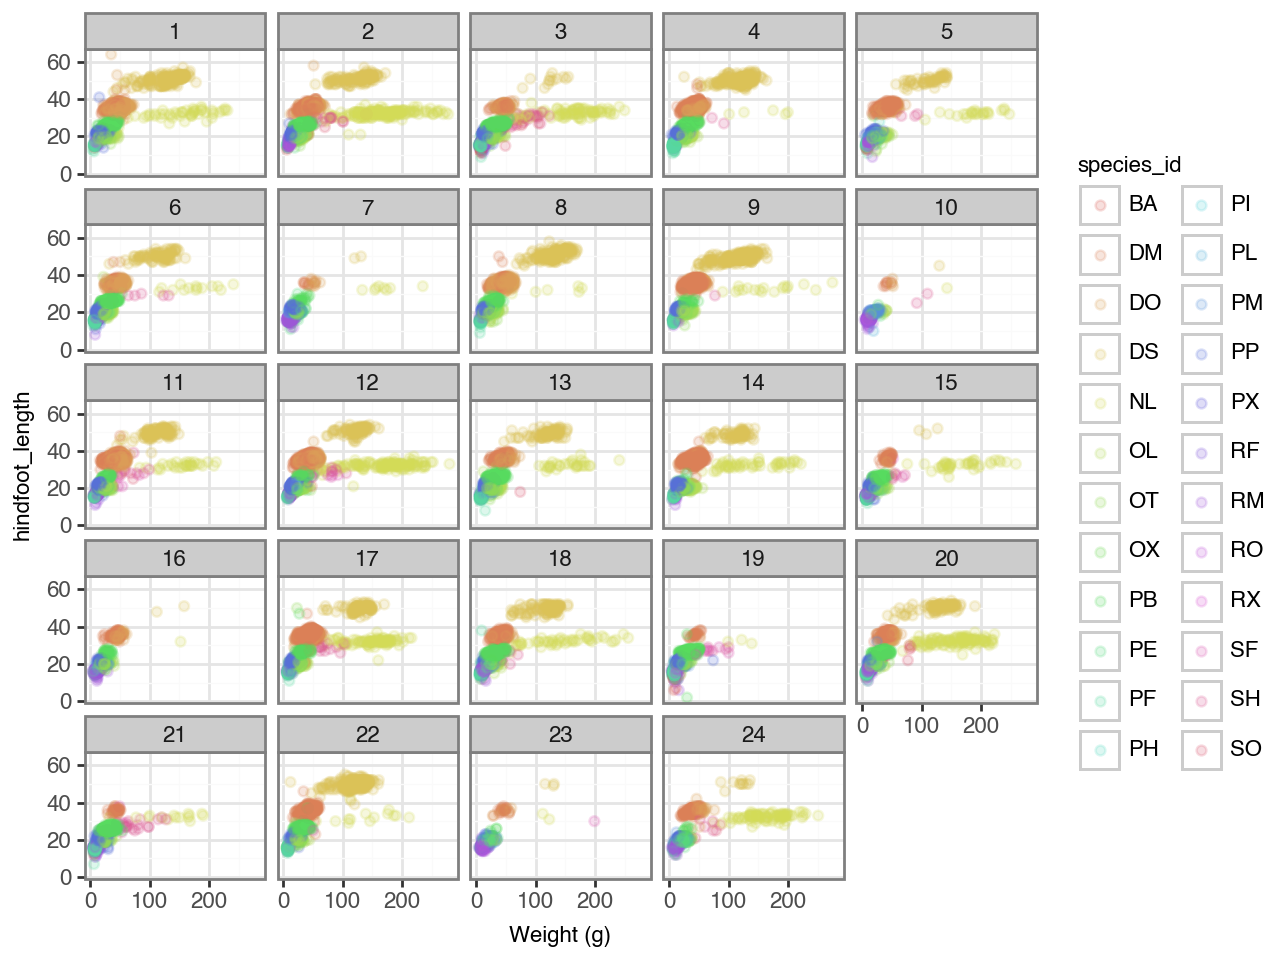

In [465]:
(p9.ggplot(data=df, 
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.2)
    + p9.xlab("Weight (g)")
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=8))
    + p9.facet_wrap('plot_id')
    
)

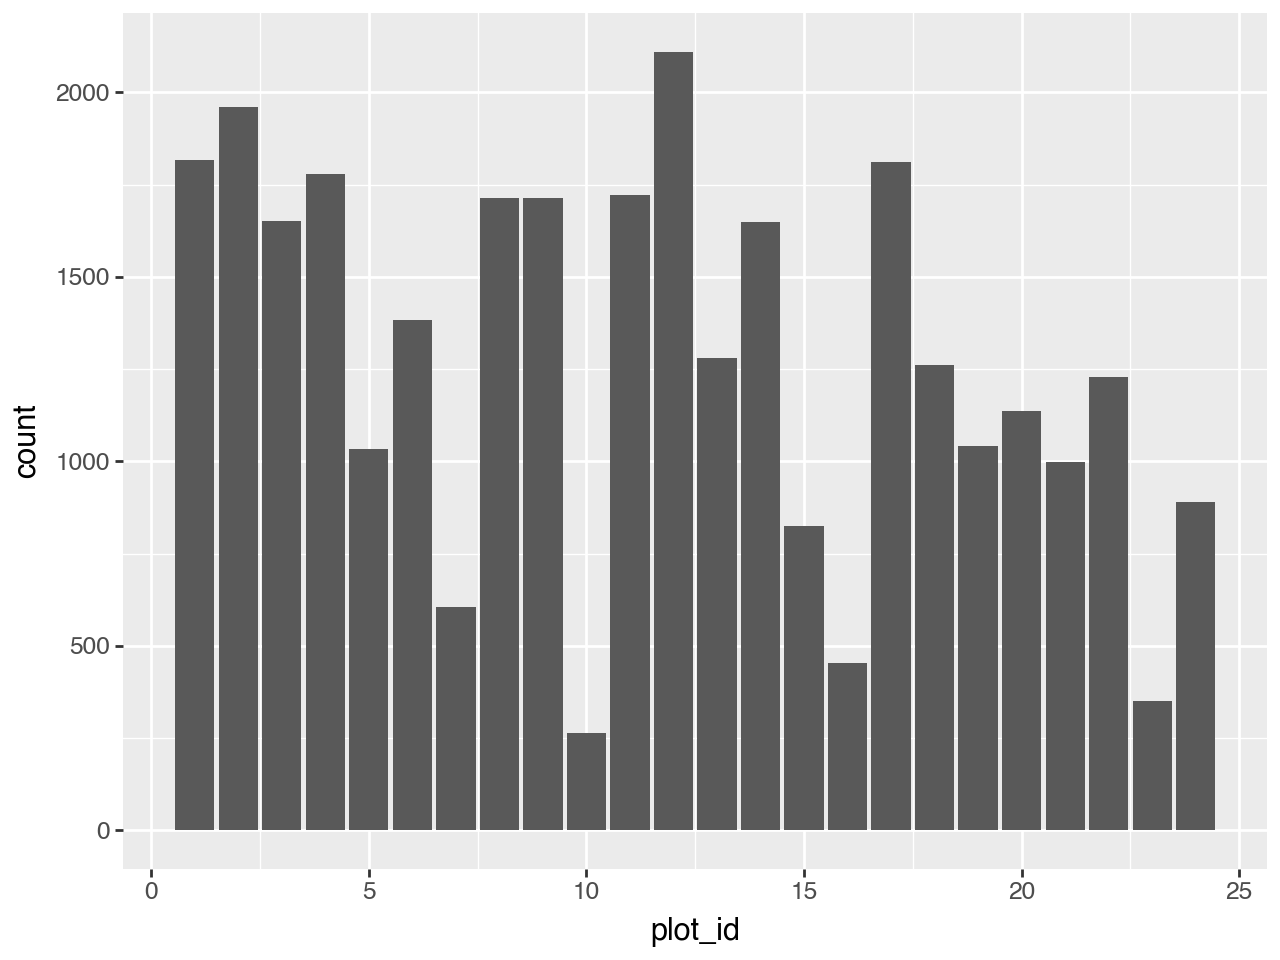

In [411]:
(p9.ggplot(data=df, 
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar()
)

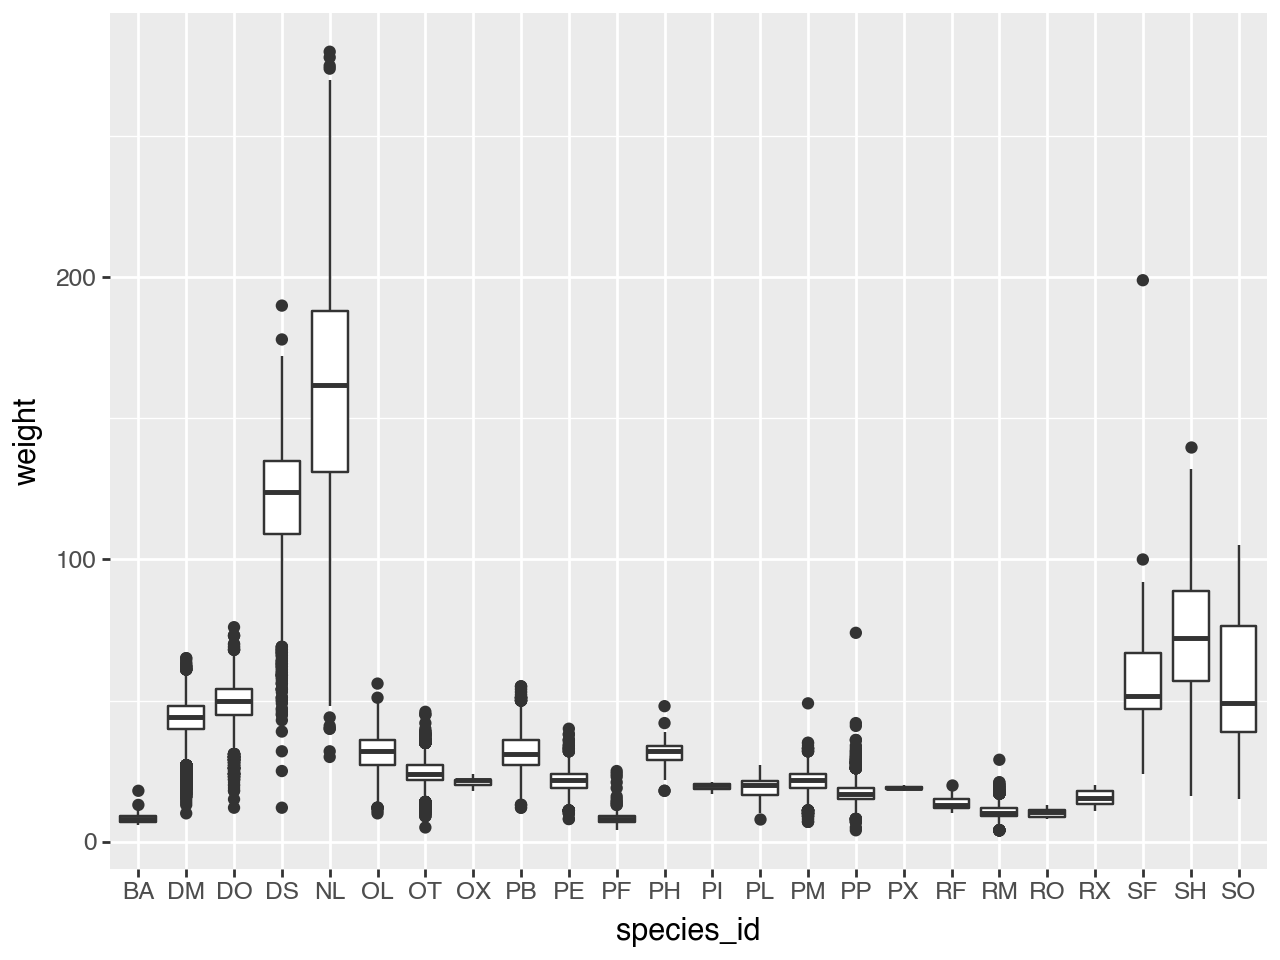

In [429]:
(p9.ggplot(data = df, 
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
)

In [451]:
y_counts = df.groupby(['year', 'species_id'])['species_id'].count()
y_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

In [453]:
y_counts = y_counts.reset_index(name='counts')
y_counts.head()

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2


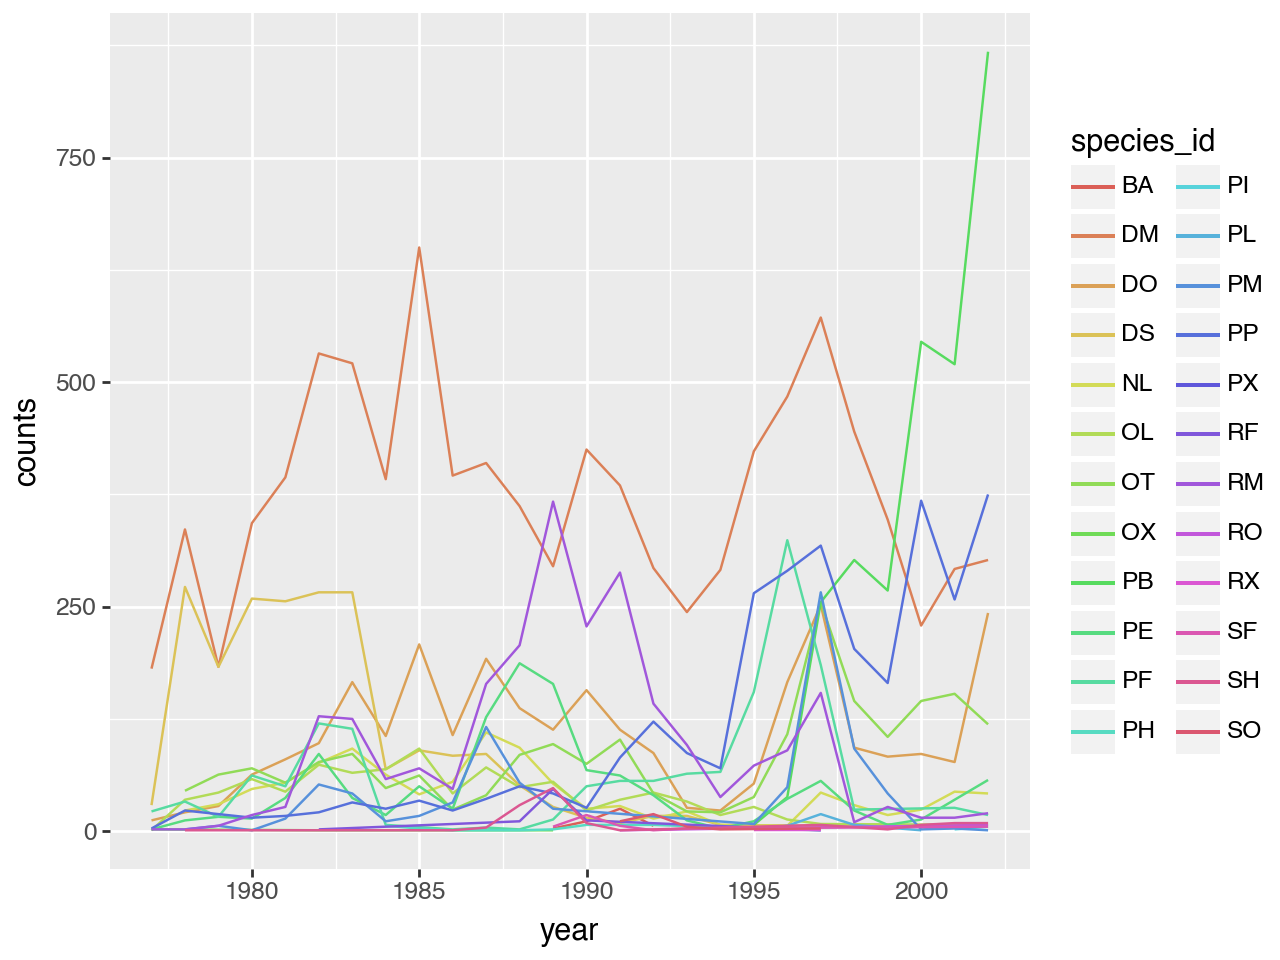

In [459]:
(p9.ggplot(data=y_counts, 
          mapping=p9.aes(x='year',
          y='counts', 
          color='species_id'))
    + p9.geom_line()
)

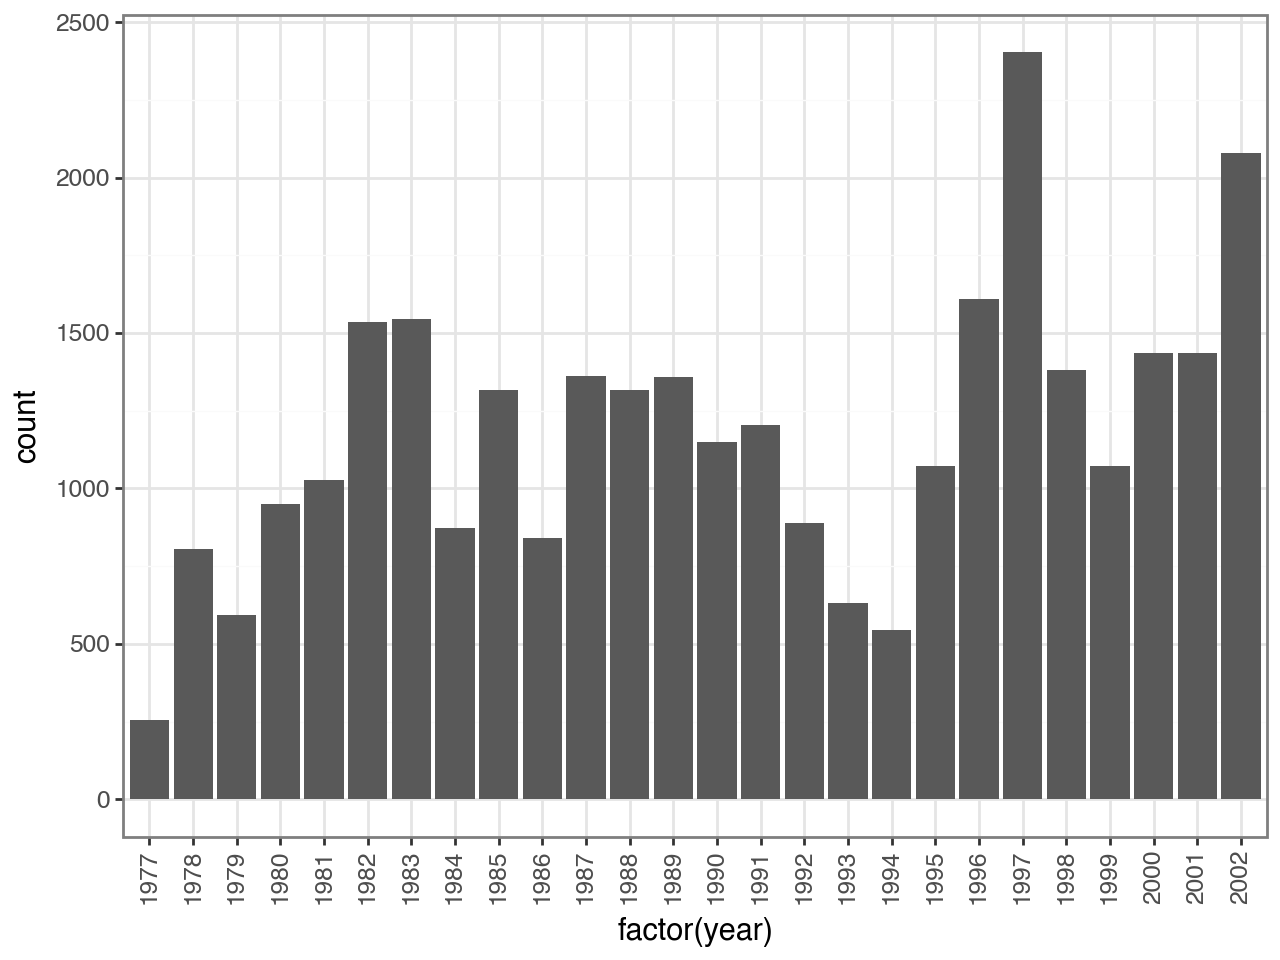

In [479]:
(p9.ggplot(data=df, 
          mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar() 
    + p9.theme_bw() 
    + p9.theme(axis_text_x = p9.element_text(angle=90)) 
)

## Matplotlib

In [482]:
import matplotlib.pyplot as plt

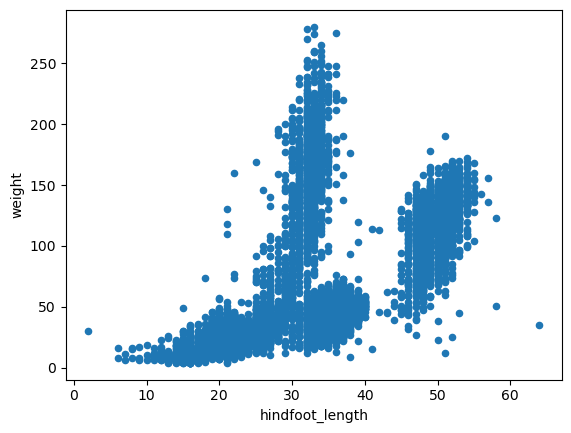

In [484]:
df = pd.read_csv('surveys.csv')
my_plot = df.plot('hindfoot_length', 'weight', kind='scatter')
plt.show()

(array([  7.,  22.,  98., 187., 241., 223., 154.,  50.,  16.,   2.]),
 array([-0.2994154 , -0.23635764, -0.17329988, -0.11024212, -0.04718435,
         0.01587341,  0.07893117,  0.14198893,  0.20504669,  0.26810445,
         0.33116221]),
 <BarContainer object of 10 artists>)

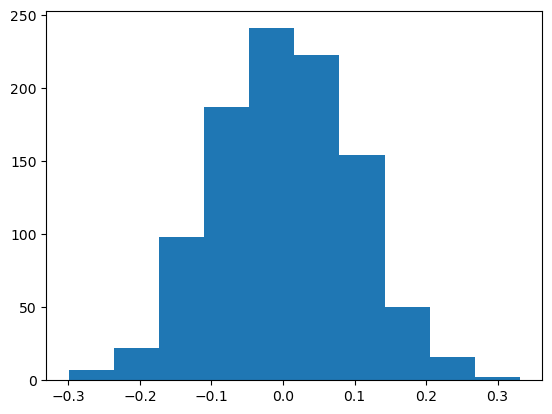

In [486]:
import numpy as np
sample = np.random.normal(0, 0.1, 1000)

plt.hist(sample)

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

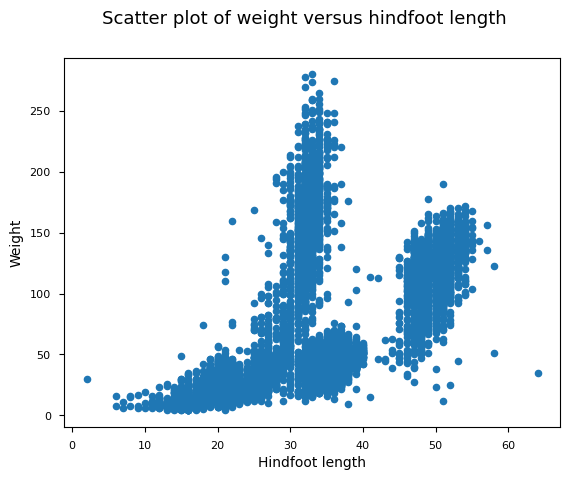

In [510]:
fig, ax1 = plt.subplots()
df.plot('hindfoot_length', 'weight', kind='scatter', ax=ax1)
ax1.set_xlabel('Hindfoot length')
ax1.set_ylabel('Weight')
ax1.tick_params(labelsize = 8, pad=6)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=13)

In [512]:
fig.savefig("my_plot.png")